<a href="https://colab.research.google.com/github/krishabiradar535/erc_assignment_sub/blob/main/ercass_signal_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy matplotlib librosa soundfile

In [2]:
from google.colab import files

uploaded = files.upload()


Saving signal_modulated_noisy_audio.wav to signal_modulated_noisy_audio.wav


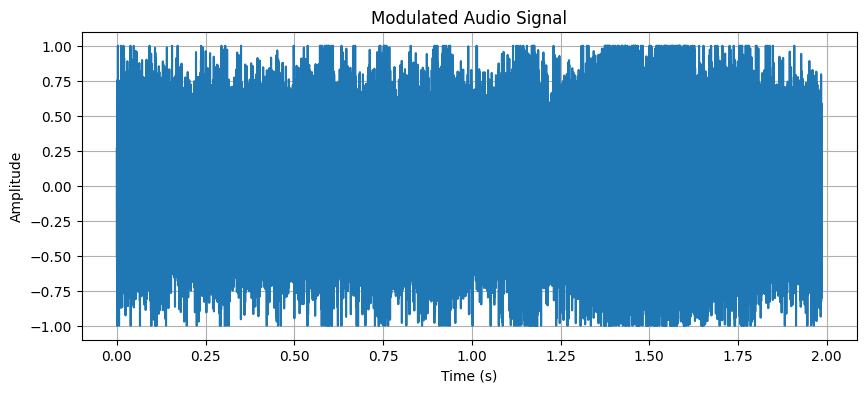

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.fft import fft, fftfreq

# signal = array of samples(amplitudes), fs = smapling frequency
signal, fs = sf.read("signal_modulated_noisy_audio.wav")

# t = time axis data points array
t = np.linspace(0, len(signal) / fs, num=len(signal))

# Plotting time domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Modulated Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


## FREQUENCY ANALYSIS

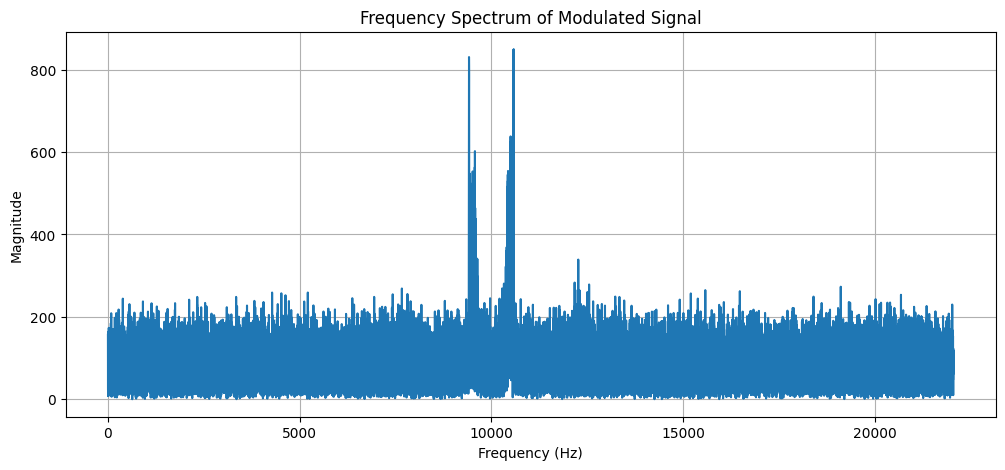

In [13]:
# FFT
n = len(signal) # no. of samples
f = fftfreq(n, 1/fs) # array of freq of each fft data point
spectrum = np.abs(fft(signal)) # array of magnitude of each freq component (how strong each freq is/amplitude)

# PlotTING positive frequencies only
plt.figure(figsize=(12, 5))
plt.plot(f[:n // 2], spectrum[:n // 2]) # leaving the negative part in mirror image
plt.title("Frequency Spectrum of Modulated Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.savefig("fft_modulated_signal")
plt.show()


carrier frequency is :  10582.307314454129


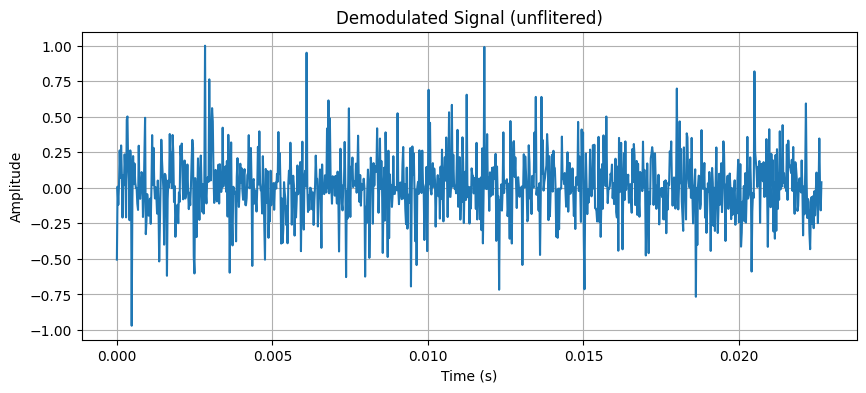

In [11]:
# Get the carrier frequency
half_spectrum = spectrum[:n // 2]
half_frequencies = f[:n // 2]

# index of max amplitude
max_index = np.argmax(half_spectrum)

# frequency corresponding to that index is the carrier frequency
fc = half_frequencies[max_index]
print("carrier frequency is : ",fc)

# Demodulation
cos_wave = np.cos(2 * np.pi * fc * t)
demodulated = signal * cos_wave

# Plotting demodulated unfiltered signal
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], demodulated[:1000])  # Zooming in
plt.title("Demodulated Signal (unflitered)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.savefig("demodulated_signal")
plt.show()


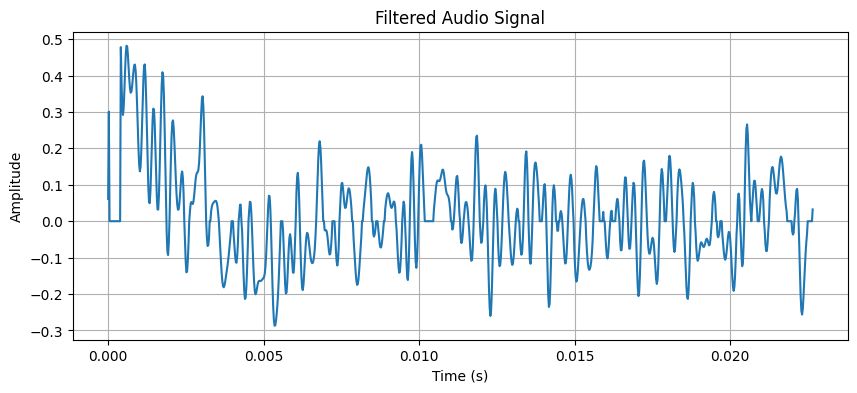

In [86]:
from scipy.signal import butter, filtfilt

# Using Butterworth filter to make the bandpass
def butterpass(lowcut, highcut, fs, order=6):
    nyquist = fs/2.0
    low = lowcut/nyquist
    high = highcut/nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply Bandpass Filter
lowcut = 100
highcut = 4500
b, a = butterpass(lowcut, highcut, fs)
filtered = filtfilt(b, a, demodulated)

# trying to remove low-amp noise
threshold = 0.5
filtered = np.where(np.abs(filtered) < threshold, filtered, 0)

#trying to remove low amp noise
threshold = 0.02
filtered = np.where(np.abs(filtered) > threshold, filtered, 0)

# Plotting filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], filtered[:1000])
plt.title("Filtered Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.savefig("flitered_signal")
plt.show()


In [87]:
from scipy.io.wavfile import write

#Resaving
filtered_norm = filtered / np.max(np.abs(filtered))
write("cleaned_audio.wav", fs, (filtered_norm * 32767).astype(np.int16))
print("saved as 'cleaned_audio.wav'")

saved as 'cleaned_audio.wav'
